In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score as r2
import seaborn as sns

from matplotlib import pyplot as plt

In [3]:
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 3)))
    print("Test R2:\t" + str(round(r2(test_true_values, test_pred_values), 3)))
    
    plt.figure(figsize=(18,10))
    
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')

    plt.show()

In [4]:
ls

Web06.ipynb
sample_submission.csv
sample_submission_1.csv
test.csv
train.csv
Без названия.ipynb
Обучение с учителем.ipynb
курсовая работа.ipynb


In [5]:
train_ds = pd.read_csv('train.csv')
test_ds = pd.read_csv('test.csv')

In [6]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [7]:
train_ds['Id'] = train_ds['Id'].astype(str)
train_ds['DistrictId'] = train_ds['DistrictId'].astype(str)

test_ds['Id'] = test_ds['Id'].astype(str)
test_ds['DistrictId'] = test_ds['DistrictId'].astype(str)

In [8]:
train_ds[['Ecology_2', 'Ecology_3', 'Shops_2']].value_counts()

indic = {
            'A': 0,
            'B': 1
}

train_ds['Ecology_2'] = train_ds['Ecology_2'].map(indic)
train_ds['Ecology_3'] = train_ds['Ecology_3'].map(indic)
train_ds['Shops_2'] = train_ds['Shops_2'].map(indic)

test_ds['Ecology_2'] = test_ds['Ecology_2'].map(indic)
test_ds['Ecology_3'] = test_ds['Ecology_3'].map(indic)
test_ds['Shops_2'] = test_ds['Shops_2'].map(indic)


In [9]:
train_ds['0'] = [x for x in range(len(train_ds))]

In [10]:
train_ds.head(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,0
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,...,1,11,3097,0,NaN,0,0,1,305018.871089,0
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,...,1,30,6207,1,1183.0,1,0,1,177734.553407,1
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,...,1,33,5261,0,240.0,3,1,1,282078.720850,2
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,...,1,1,264,0,NaN,0,1,1,168106.007630,3
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,...,1,33,8667,2,NaN,0,6,1,343995.102962,4
5,5804,99,3.0,62.528465,47.103833,6.0,9,9.0,1972,0.012339,...,1,35,5776,1,2078.0,2,4,1,161044.944138,5
6,8864,44,1.0,33.938750,21.772930,9.0,1,12.0,1968,0.232205,...,1,24,4860,1,80.0,0,3,1,142402.739272,6
7,13072,59,2.0,50.391814,32.893256,8.0,8,17.0,1986,0.019509,...,1,37,7687,11,176.0,5,5,1,326174.175191,7
8,9951,1,1.0,46.887892,44.628132,1.0,12,20.0,1977,0.007122,...,1,1,264,0,NaN,0,1,1,160400.401732,8
9,8094,6,3.0,79.867477,75.085125,1.0,3,17.0,2014,0.243205,...,1,5,1564,0,540.0,0,0,1,194756.023945,9


In [11]:
train_ds.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,0
count,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,0.990300,0.972500,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,0.917500,214138.857399,4999.50000
std,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,0.098015,0.163543,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,0.275139,92872.293865,2886.89568
min,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59174.778028,0.00000
25%,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,1.000000,1.000000,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,1.000000,153872.633942,2499.75000
50%,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,1.000000,1.000000,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,1.000000,192269.644879,4999.50000
75%,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,1.000000,1.000000,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,1.000000,249135.462171,7499.25000
max,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,1.000000,1.000000,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,1.000000,633233.466570,9999.00000


# Регилируем выбросы 

In [12]:
train_ds.loc[train_ds['HouseYear'] > 2022, 'HouseYear'] = 2022

In [13]:
train_ds['Rooms'].value_counts()

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

In [14]:
train_ds.loc[train_ds['Rooms'].isin([0, 10, 19]), 'Rooms'] = train_ds['Rooms'].median()
train_ds['Rooms'] = train_ds['Rooms'].apply(int)

In [15]:
# если площадь кухни больше общей или равна 0 ставим смедиану
train_ds.loc[train_ds['KitchenSquare'] > train_ds['Square'], 'KitchenSquare'] = train_ds['KitchenSquare'].median()
train_ds.loc[train_ds['KitchenSquare']==0, 'KitchenSquare'] = train_ds['KitchenSquare'].median()

# если количество этажей равно 0 ставим 1
train_ds.loc[train_ds['HouseFloor']==0, 'HouseFloor'] = 1

# если номер этажа больше количество этажей ставим этаж
train_ds.loc[train_ds['Floor'] > train_ds['HouseFloor'], 'HouseFloor'] = train_ds['Floor']

train_ds.loc[train_ds['HouseYear'] < 1900, 'HouseYear'] = train_ds['HouseYear'].median()

# если общая площадь меньше 5 метров выставляем среднюю
train_ds.loc[train_ds['Square'] < 5, 'Square'] = train_ds['Square'].median()

#  если жилая площадь больше общей-кухня метров выставляем общеую-кухня
train_ds.loc[train_ds['LifeSquare']>train_ds['Square'] - train_ds['KitchenSquare'], 'LifeSquare'] = train_ds['Square'] - train_ds['KitchenSquare']

In [16]:
train_ds.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,0
count,10000.000000,10000.000000,7887.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,1.888800,56.364910,35.397599,6.27980,8.526700,13.435700,1984.872800,0.118858,0.990300,0.972500,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,0.917500,214138.857399,4999.50000
std,0.812096,20.992332,18.748478,4.81047,5.241148,6.094012,18.417132,0.119025,0.098015,0.163543,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,0.275139,92872.293865,2886.89568
min,1.000000,5.129222,0.128114,1.00000,1.000000,1.000000,1910.000000,0.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59174.778028,0.00000
25%,1.000000,41.789599,22.672267,4.00000,4.000000,9.000000,1974.000000,0.017647,1.000000,1.000000,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,1.000000,153872.633942,2499.75000
50%,2.000000,52.513580,32.421207,6.00000,7.000000,14.000000,1977.000000,0.075424,1.000000,1.000000,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,1.000000,192269.644879,4999.50000
75%,2.000000,65.900625,44.594466,9.00000,12.000000,17.000000,2001.000000,0.195781,1.000000,1.000000,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,1.000000,249135.462171,7499.25000
max,6.000000,641.065193,631.065193,123.00000,42.000000,117.000000,2022.000000,0.521867,1.000000,1.000000,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,1.000000,633233.466570,9999.00000


In [17]:
list_nan = []

for name in train_ds.columns:
    if train_ds[name].isnull().sum():
        list_nan.append(name)

In [18]:
ds_nan = train_ds[list_nan]
train_ds.drop(columns=ds_nan, axis=1, inplace=True)

# Предсказываем пропуски поля Healthcare_1

In [19]:
target_name = 'Healthcare_1'

In [20]:
train_ds[target_name] = ds_nan[target_name]

train_ds['nan'] = 0
train_ds.loc[train_ds[target_name].isna(), 'nan'] = 1

h_train_ds = train_ds[train_ds['nan']==0]
h_test_ds = train_ds[train_ds['nan']==1]

h_train_ds[target_name] = h_train_ds[target_name].apply(int)
h_train_ds = h_train_ds.drop(columns='nan')

In [21]:
X = h_train_ds.drop(columns=[target_name, '0'])
y = h_train_ds[target_name]

Train R2:	1.0
Test R2:	0.996


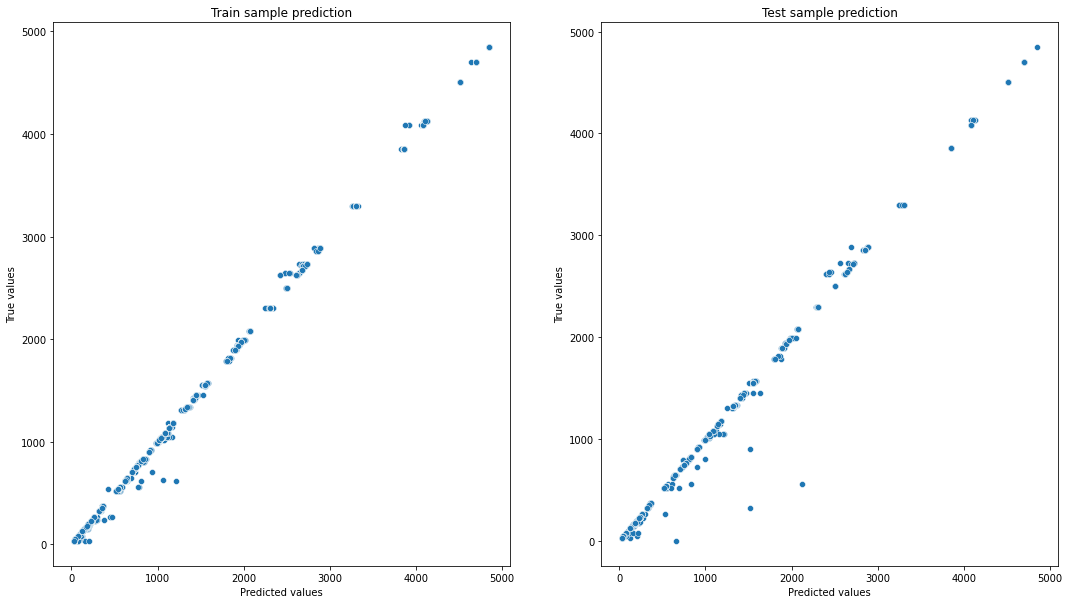

In [22]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=21)

rf_model = RandomForestRegressor(random_state=21, criterion='mse')
rf_model.fit(X_train, y_train)

y_train_preds = rf_model.predict(X_train)
y_test_preds = rf_model.predict(X_valid)

evaluate_preds(y_train, y_train_preds, y_valid, y_test_preds)

In [23]:
w = [k for k in h_test_ds['0']]

h_test_ds = h_test_ds.drop(columns=[target_name, '0'])
h_test_ds = h_test_ds.drop(columns='nan')

h_test_ds[target_name] = rf_model.predict(h_test_ds)
h_test_ds[target_name] = h_test_ds[target_name].apply(int)

h_test_ds['0'] = w

In [24]:
train_ds = pd.concat([h_train_ds, h_test_ds], join='outer')
train_ds = train_ds.sort_values(by=['0'])

# Предсказываем пропуски поля LifeSquare

In [25]:
target_name = 'LifeSquare'

In [26]:
train_ds[target_name] = ds_nan[target_name]

train_ds['nan'] = 0
train_ds.loc[train_ds[target_name].isna(), 'nan'] = 1

l_train_ds = train_ds[train_ds['nan']==0]
l_test_ds = train_ds[train_ds['nan']==1]

l_train_ds[target_name] = l_train_ds[target_name].apply(int)

l_train_ds = l_train_ds.drop(columns='nan')

In [27]:
l_train_ds.head(10)

,Id,DistrictId,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,...,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price,0,Healthcare_1,LifeSquare
1,3013,22,1,39.832524,8.0,7,8.0,1966,0.118537,1,...,30,6207,1,1,0,1,177734.553407,1,1183,23
2,8215,1,3,78.342215,10.0,2,17.0,1988,0.025609,1,...,33,5261,0,3,1,1,282078.720850,2,240,47
4,13866,94,2,64.285067,9.0,16,16.0,1972,0.282798,1,...,33,8667,2,0,6,1,343995.102962,4,2119,38
5,5804,99,3,62.528465,6.0,9,9.0,1972,0.012339,1,...,35,5776,1,2,4,1,161044.944138,5,2078,47
6,8864,44,1,33.938750,9.0,1,12.0,1968,0.232205,1,...,24,4860,1,0,3,1,142402.739272,6,80,21
7,13072,59,2,50.391814,8.0,8,17.0,1986,0.019509,1,...,37,7687,11,5,5,1,326174.175191,7,176,32
8,9951,1,1,46.887892,1.0,12,20.0,1977,0.007122,1,...,1,264,0,0,1,1,160400.401732,8,404,44
9,8094,6,3,79.867477,1.0,3,17.0,2014,0.243205,1,...,5,1564,0,0,0,1,194756.023945,9,540,75
10,535,2,3,74.199049,10.0,5,14.0,2008,0.035145,1,...,42,9292,3,0,3,1,512797.373401,10,2620,44
11,16755,88,2,53.975144,8.0,2,12.0,1978,0.127376,1,...,43,8429,3,3,9,1,253124.005332,11,1944,34


In [28]:
X = l_train_ds.drop(columns=[target_name, '0'])
y = l_train_ds[target_name]

Train R2:	0.95
Test R2:	0.671


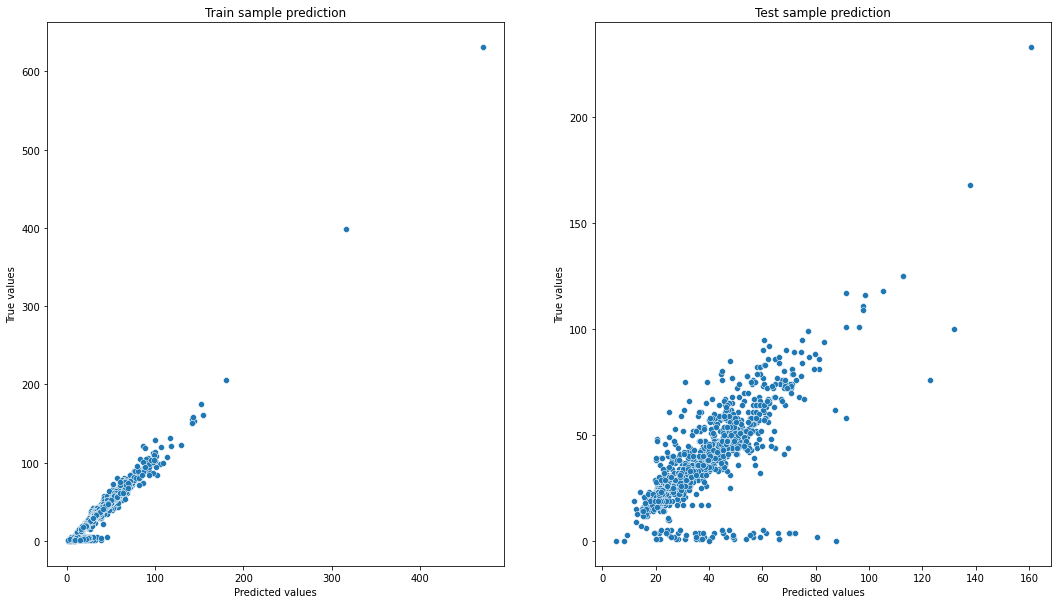

In [29]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=21)

rf_model = RandomForestRegressor(random_state=21, criterion='mse')
rf_model.fit(X_train, y_train)

y_train_preds = rf_model.predict(X_train)
y_test_preds = rf_model.predict(X_valid)

evaluate_preds(y_train, y_train_preds, y_valid, y_test_preds)

In [30]:
w = [k for k in l_test_ds['0']]

l_test_ds = l_test_ds.drop(columns=[target_name, '0'])
l_test_ds = l_test_ds.drop(columns='nan')

l_test_ds[target_name] = rf_model.predict(l_test_ds)
l_test_ds[target_name] = l_test_ds[target_name].apply(int)

l_test_ds['0'] = w

In [31]:
train_ds = pd.concat([l_train_ds, l_test_ds])
train_ds = train_ds.sort_values(by=['0'])

In [32]:
train_ds.head(10)

,Id,DistrictId,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,...,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price,0,Healthcare_1,LifeSquare
0,11809,27,3,115.027311,10.0,4,10.0,2014,0.075424,1,...,11,3097,0,0,0,1,305018.871089,0,836,65
1,3013,22,1,39.832524,8.0,7,8.0,1966,0.118537,1,...,30,6207,1,1,0,1,177734.553407,1,1183,23
2,8215,1,3,78.342215,10.0,2,17.0,1988,0.025609,1,...,33,5261,0,3,1,1,282078.720850,2,240,47
3,2352,1,1,40.409907,1.0,10,22.0,1977,0.007122,1,...,1,264,0,0,1,1,168106.007630,3,404,35
4,13866,94,2,64.285067,9.0,16,16.0,1972,0.282798,1,...,33,8667,2,0,6,1,343995.102962,4,2119,38
5,5804,99,3,62.528465,6.0,9,9.0,1972,0.012339,1,...,35,5776,1,2,4,1,161044.944138,5,2078,47
6,8864,44,1,33.938750,9.0,1,12.0,1968,0.232205,1,...,24,4860,1,0,3,1,142402.739272,6,80,21
7,13072,59,2,50.391814,8.0,8,17.0,1986,0.019509,1,...,37,7687,11,5,5,1,326174.175191,7,176,32
8,9951,1,1,46.887892,1.0,12,20.0,1977,0.007122,1,...,1,264,0,0,1,1,160400.401732,8,404,44
9,8094,6,3,79.867477,1.0,3,17.0,2014,0.243205,1,...,5,1564,0,0,0,1,194756.023945,9,540,75


In [33]:
train_ds = train_ds.drop(columns=['0'])

# Проверяем тестовые данные на пропуски

In [34]:
test_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   object 
 1   DistrictId     5000 non-null   object 
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     3959 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   int64  
 11  Ecology_3      5000 non-null   int64  
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Healthcare_1   2623 non-null   float64
 16  Helthcare_2    5000 non-null   int64  
 17  Shops_1        5000 non-null   int64  
 18  Shops_2 

In [35]:
list_nan = []

for name in test_ds.columns:
    if test_ds[name].isnull().sum():
        list_nan.append(name)
        
ds_nan = test_ds[list_nan]
test_ds.drop(columns=list_nan, axis=1, inplace=True)

train_ds_1 = train_ds.drop(columns=['Price', 'Healthcare_1'])

# Предсказываем данные LifeSquare и Healthcare_1 тестовых данных на основании тренировочных данных

# LifeSquare

In [36]:
train_ds_1 = train_ds.drop(columns=['Price', 'Healthcare_1'])

target_name = 'LifeSquare'

test_ds[target_name] = ds_nan[target_name]

test_ds['0'] = [x for x in range(len(test_ds))]

test_ds['nan'] = 0
test_ds.loc[test_ds[target_name].isna(), 'nan'] = 1

test_ds_0 = test_ds[test_ds['nan']==0]
test_ds_1 = test_ds[test_ds['nan']==1]

X = train_ds_1.drop(columns=[target_name])
y = train_ds_1[target_name]

In [37]:
X = train_ds_1.drop(columns=[target_name])
y = train_ds_1[target_name]

Train R2:	0.969
Test R2:	0.797


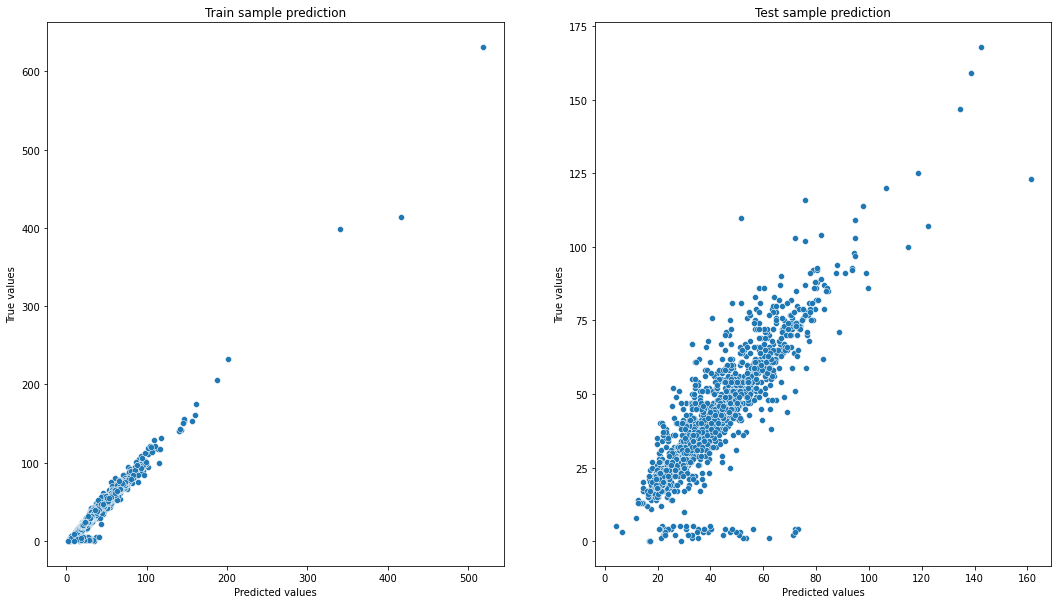

In [38]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=21)

rf_model = RandomForestRegressor(random_state=21, criterion='mse')
rf_model.fit(X_train, y_train)

y_train_preds = rf_model.predict(X_train)
y_test_preds = rf_model.predict(X_valid)

evaluate_preds(y_train, y_train_preds, y_valid, y_test_preds)

In [39]:
w = [k for k in test_ds_1['0']]

test_ds_1 = test_ds_1.drop(columns=[target_name, '0'])
test_ds_1 = test_ds_1.drop(columns='nan')

test_ds_1[target_name] = rf_model.predict(test_ds_1)
test_ds_1[target_name] = test_ds_1[target_name].apply(int)

test_ds_1['0'] = w

test_ds = pd.concat([test_ds_0, test_ds_1])
test_ds = test_ds.sort_values(by=['0'])

# Healthcare_1

In [40]:
train_ds_1 = train_ds.drop(columns=['Price'])

target_name = 'Healthcare_1'

test_ds[target_name] = ds_nan[target_name]

test_ds['0'] = [x for x in range(len(test_ds))]

test_ds['nan'] = 0
test_ds.loc[test_ds[target_name].isna(), 'nan'] = 1

test_ds_0 = test_ds[test_ds['nan']==0]
test_ds_1 = test_ds[test_ds['nan']==1]

X = train_ds_1.drop(columns=[target_name])

In [41]:
X = train_ds_1.drop(columns=[target_name])
y = train_ds_1[target_name]

Train R2:	1.0
Test R2:	0.999


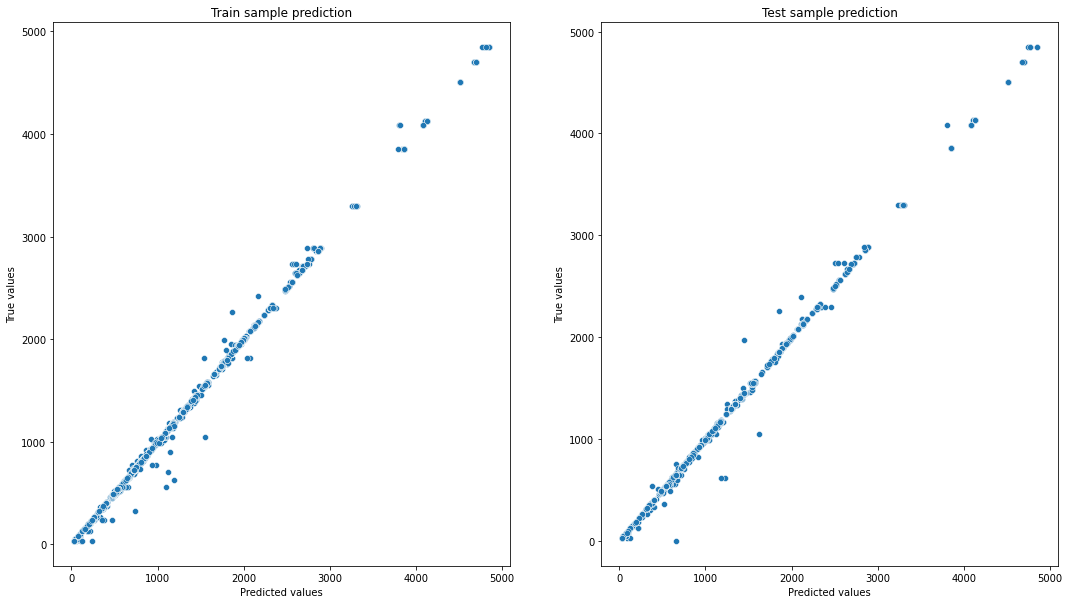

In [42]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=21)

rf_model = RandomForestRegressor(random_state=21, criterion='mse')
rf_model.fit(X_train, y_train)

y_train_preds = rf_model.predict(X_train)
y_test_preds = rf_model.predict(X_valid)

evaluate_preds(y_train, y_train_preds, y_valid, y_test_preds)

In [43]:
w = [k for k in test_ds_1['0']]

test_ds_1 = test_ds_1.drop(columns=[target_name, '0'])
test_ds_1 = test_ds_1.drop(columns='nan')

In [44]:
test_ds_1[target_name] = rf_model.predict(test_ds_1)
test_ds_1[target_name] = test_ds_1[target_name].apply(int)

test_ds_1['0'] = w

test_ds = pd.concat([test_ds_0, test_ds_1])
test_ds = test_ds.sort_values(by=['0'])

In [45]:
test_ds = test_ds.drop(columns=['0', 'nan'])

# Предсказываем пропуски поля Price

In [46]:
target_name = 'Price'

Train R2:	0.961
Test R2:	0.746


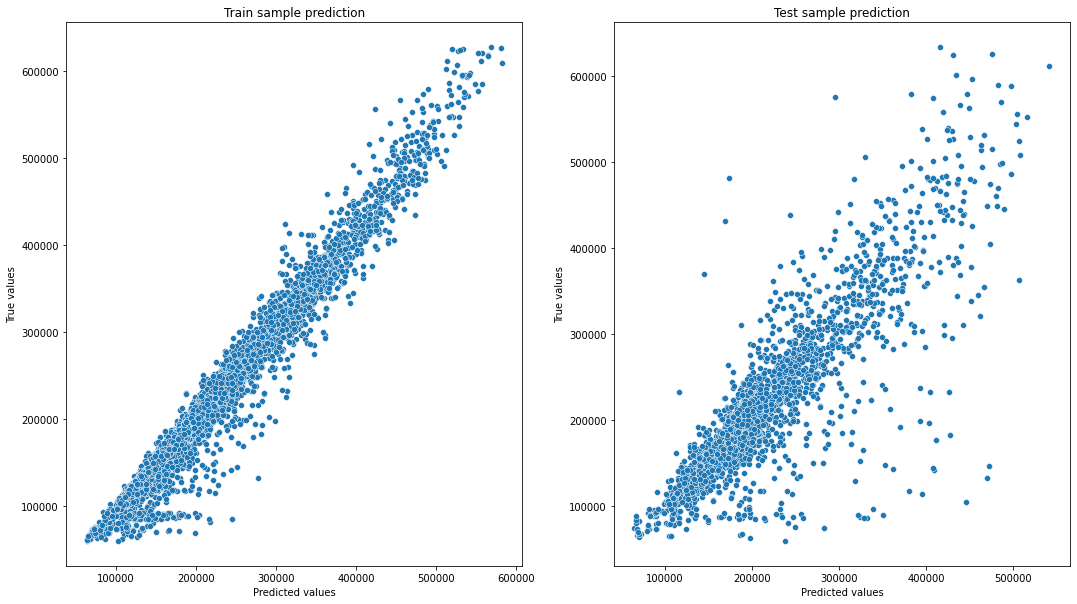

In [47]:
X = train_ds.drop(columns=[target_name])
y = train_ds[target_name]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=21)

rf_model = RandomForestRegressor(random_state=21, criterion='mse')
rf_model.fit(X_train, y_train)

y_train_preds = rf_model.predict(X_train)
y_test_preds = rf_model.predict(X_valid)

evaluate_preds(y_train, y_train_preds, y_valid, y_test_preds)

In [48]:
test_ds[target_name] = rf_model.predict(test_ds)

In [49]:
test_ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   object 
 1   DistrictId     5000 non-null   object 
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   KitchenSquare  5000 non-null   float64
 5   Floor          5000 non-null   int64  
 6   HouseFloor     5000 non-null   float64
 7   HouseYear      5000 non-null   int64  
 8   Ecology_1      5000 non-null   float64
 9   Ecology_2      5000 non-null   int64  
 10  Ecology_3      5000 non-null   int64  
 11  Social_1       5000 non-null   int64  
 12  Social_2       5000 non-null   int64  
 13  Social_3       5000 non-null   int64  
 14  Helthcare_2    5000 non-null   int64  
 15  Shops_1        5000 non-null   int64  
 16  Shops_2        5000 non-null   int64  
 17  LifeSquare     5000 non-null   float64
 18  Healthca

In [50]:
test_ds.head(10)

,Id,DistrictId,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,LifeSquare,Healthcare_1,Price
0,4567,44,1.0,36.847630,5.0,5,9.0,1970,0.036122,1,1,24,4378,0,1,1,1,19.094182,1036.0,184680.030191
1,5925,62,1.0,42.493907,10.0,7,17.0,2017,0.072158,1,1,2,629,1,0,0,0,42.568133,486.0,142427.960873
2,960,27,2.0,59.463678,9.0,19,19.0,1977,0.211401,1,1,9,1892,0,0,1,1,41.000000,737.0,179894.603657
3,3848,23,3.0,49.646030,6.0,2,2.0,1965,0.014073,1,1,2,475,0,0,0,1,33.893825,319.0,136615.822977
4,746,74,1.0,53.837056,1.0,8,17.0,1977,0.309479,1,1,35,7715,4,0,6,1,38.000000,990.0,277039.008546
5,868,38,3.0,87.139994,10.0,4,23.0,2011,0.060753,1,1,15,2787,2,0,7,1,53.180419,520.0,298024.224687
6,672,62,1.0,46.269456,11.0,8,17.0,2014,0.072158,1,1,2,629,1,0,0,0,22.820239,486.0,147446.951627
7,2471,2,2.0,48.172969,6.0,4,9.0,1974,0.000000,1,1,33,7425,1,2,5,1,29.924204,635.0,199638.815501
8,4510,1,1.0,43.153761,9.0,10,17.0,2014,0.007122,1,1,1,264,0,0,1,1,21.017596,402.0,137254.919348
9,8354,62,2.0,62.593787,10.0,1,16.0,1981,0.002212,1,1,39,7614,3,1,5,0,59.786844,634.0,272763.178220


In [51]:
result = test_ds[['Id', 'Price']]
result.to_csv('sample_submission.csv')